In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from plotly.offline import init_notebook_mode, iplot 
from wordcloud import WordCloud
from palettable.colorbrewer.qualitative import Pastel1_7
import datetime
from datetime import datetime
import folium
%matplotlib inline

In [4]:
seattle = pd.read_csv("./listings-2.csv", sep=',')

In [103]:
# analizo el dataset
seattle.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61094,-122.29286,Entire home/apt,188,7,38,2022-01-07,0.23,1,295,6,STR-OPLI-19-002837
1,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,30,157,2021-09-14,1.02,2,0,8,str-opli-19-002622
2,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,75,2,155,2022-03-20,1.09,9,363,7,STR-OPLI-19-003039
3,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,175,5,60,2022-02-18,0.48,2,221,19,STR-OPLI-19-002182
4,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,125,3,60,2022-03-16,0.48,2,217,4,STR-OPLI-19-002182


In [102]:
# quiero ver el tamaño que tiene
seattle.shape

(4883, 18)

In [105]:
# quiero ver los nulos
seattle.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        733
reviews_per_month                  733
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1171
dtype: int64

In [9]:
seattle.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.883000e+03,4883,4.883000e+03,4881,4883,4883,4883.000000,4883.000000,4883,4883.000000,4883.000000,4883.000000,4150,4150.000000,4883.000000,4883.000000,4883.000000,3712
unique,NaN,4785,NaN,1527,17,89,NaN,NaN,4,NaN,NaN,NaN,610,NaN,NaN,NaN,NaN,2619
top,NaN,Incredible apartment home | 1 BR in Seattle,NaN,Blueground,Other neighborhoods,Broadway,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-03-20,NaN,NaN,NaN,NaN,Exempt
freq,NaN,9,NaN,234,944,300,NaN,NaN,4088,NaN,NaN,NaN,226,NaN,NaN,NaN,NaN,107
mean,3.686732e+16,NaN,1.102293e+08,NaN,NaN,NaN,47.625521,-122.333505,NaN,159.942658,14.190866,62.844153,NaN,2.124299,20.284866,171.974401,16.165472,NaN
std,1.395225e+17,NaN,1.275190e+08,NaN,NaN,NaN,0.049301,0.033598,NaN,137.399150,21.037500,97.831989,NaN,1.869673,51.701695,120.475129,21.523185,NaN
min,2.318000e+03,NaN,2.536000e+03,NaN,NaN,NaN,47.495210,-122.420700,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.978602e+07,NaN,1.362193e+07,NaN,NaN,NaN,47.602000,-122.356325,NaN,90.000000,2.000000,3.000000,NaN,0.610000,1.000000,61.000000,1.000000,NaN
50%,3.978193e+07,NaN,5.365014e+07,NaN,NaN,NaN,47.622480,-122.331375,NaN,128.000000,3.000000,22.000000,NaN,1.650000,2.000000,163.000000,6.000000,NaN
75%,5.117393e+07,NaN,1.527342e+08,NaN,NaN,NaN,47.663060,-122.309900,NaN,188.000000,30.000000,80.000000,NaN,3.110000,8.000000,279.000000,25.000000,NaN


In [106]:
# reemplazo los valores nulos de los precios por la media de los precios de la columna
seattle['price'] = seattle['price'].replace(0,np.median(seattle['price']))

In [147]:
#  elimino las columnas license y calculated_host_listings porque no las usaré en el análisis
seattle = seattle.drop(['license', 'calculated_host_listings_count'], axis=1) 

In [148]:
# quiero ver las reseñas para saber desde cuando son los datos, le aplico datetime para que lo pueda leer bien
seattle['last_review'] = seattle['last_review'].apply(pd.to_datetime) 

In [149]:
# las primeras reseñas empiezan en 2013, así que sé que desde está fecha tengo los datos
reseñas = seattle[seattle['last_review'].dt.year == 2013] 
reseñas.groupby('neighbourhood_group').sum().reset_index()

,neighbourhood_group,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
0,Downtown,607788,103427,47.61317,-122.33346,232,2,2,0.02,365,0


89


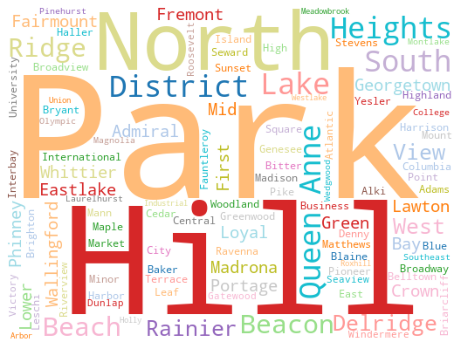

In [150]:
# NOMBRE DE TODOS LOS BARRIOS
print(seattle.neighbourhood.nunique()) # 89 barrios diferentes en barcelona en los q opera airbnb
nombre_barrios= seattle.neighbourhood.unique() # aqui los nombres unicos de los barrios

# hago visualización de todos los nombre de barrio
plt.subplots(figsize=(8,8))       
wordcloud = WordCloud(
            background_color='white', 
            width=512,               
            height=384,  colormap='tab20',).generate("  ".join(nombre_barrios))    # es para los espacios
plt.imshow(wordcloud)
plt.axis('off');      
plt.savefig('./img/nombre_barrios_seattle.png') 

In [151]:
barrio_menos_recurrente = seattle['neighbourhood'].value_counts()
barrio_menos_recurrente = barrio_menos_recurrente[barrio_menos_recurrente < 10]
df =barrio_menos_recurrente.reset_index()
df

,index,neighbourhood
0,View Ridge,9
1,Roxhill,7
2,Windermere,7
3,Meadowbrook,5
4,Holly Park,5
5,Industrial District,1
6,Harbor Island,1


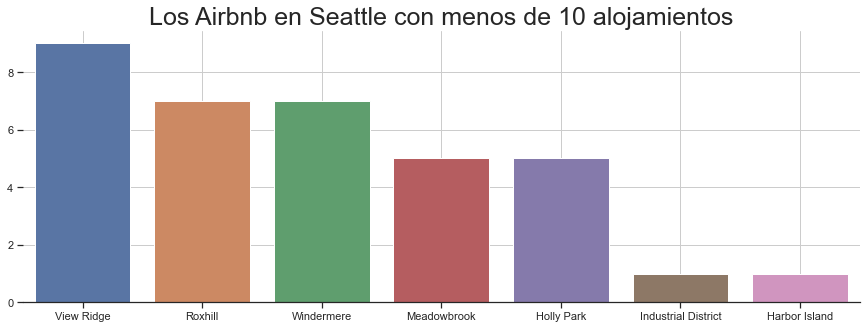

In [152]:
# quiero ver los barrios con menos de 10 alojamientos
barrio_menos_recurrente = seattle['neighbourhood'].value_counts()
barrio_menos_recurrente = barrio_menos_recurrente[barrio_menos_recurrente < 10]
df =pd.DataFrame(barrio_menos_recurrente).reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x = df['index'], y = df['neighbourhood'], data = df)
#plt.xticks(rotation = 90)
sns.despine(left = True)
plt.title('Los Airbnb en Seattle con menos de 10 alojamientos', size=25)
plt.xlabel('')
plt.ylabel('')
plt.grid();
plt.savefig('./img/barrio_menos_concurrente_10_seattle.png')

                        index  neighbourhood
0                    Broadway            300
1                    Belltown            269
2         University District            191
3                     Fremont            170
4                 Wallingford            159
5                       Minor            156
6           North Beacon Hill            127
7            Lower Queen Anne            116
8            South Lake Union            115
9                  First Hill            104
10  Central Business District            103
11                 Green Lake            102
12                  Greenwood            101


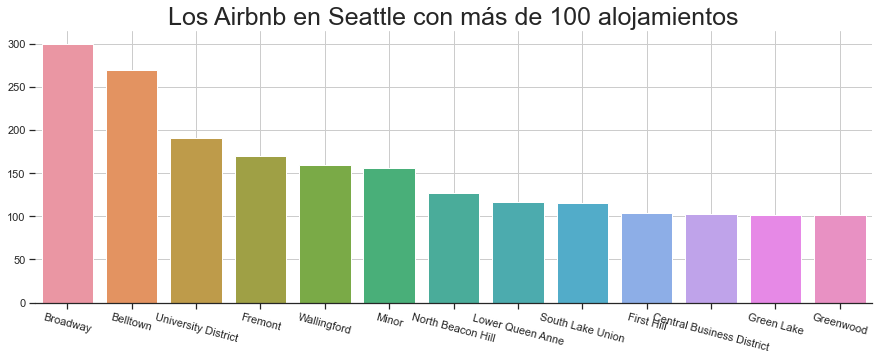

In [153]:
#Los barrios con mas Airbnbs, en seatle, lo máximo que hay son 300 airbnb
barrio_mas_recurrente = seattle['neighbourhood'].value_counts()
barrio_mas_recurrente = barrio_mas_recurrente[barrio_mas_recurrente > 100]
df =pd.DataFrame(barrio_mas_recurrente).reset_index()
print(df)
counts= barrio_mas_recurrente

plt.figure(figsize=(15, 5))
sns.barplot(x = df['index'], y = df['neighbourhood'], data = df)
plt.xticks()
sns.despine(left = True)
plt.title('Los Airbnb en Seattle con más de 100 alojamientos', size=25)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = -15);
plt.grid();
plt.savefig('./img/barrio_mas_concurrente_seattle.png')

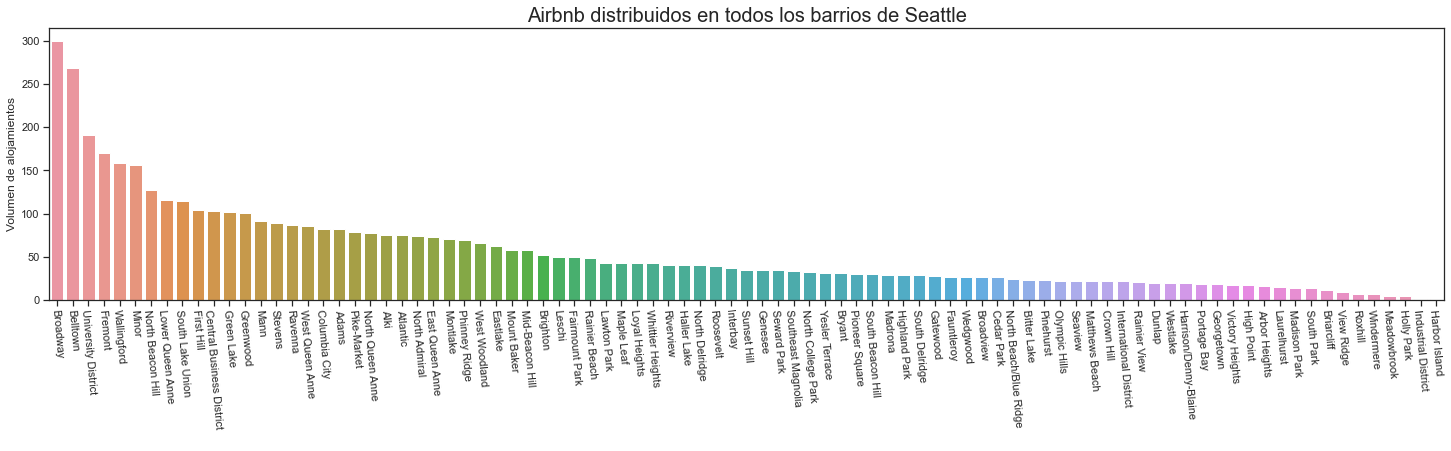

In [154]:
# Visualización de todos los barrios en general

plt.figure(figsize=(25, 5))
sns.countplot(x = 'neighbourhood', data=seattle, order = seattle['neighbourhood'].value_counts().index)
plt.title("Airbnb distribuidos en todos los barrios de Seattle", fontsize= 20)
plt.xlabel(" ")
plt.ylabel("Volumen de alojamientos")
plt.xticks(rotation = -85);
plt.savefig('./img/alojamiento_por_barrios_10_seattle.png') 

17


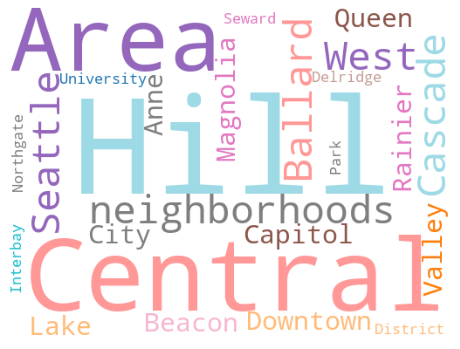

In [155]:
# NOMBRE DE TODOS LOS distritos
print(seattle.neighbourhood_group.nunique()) 
nombre_distritos= seattle.neighbourhood_group.unique() 

plt.subplots(figsize=(8,8))      
wordcloud = WordCloud(
                          background_color='white', 
                          width=512,         
                          height=384,  colormap='tab20',
                         ).generate("  ".join(nombre_distritos))    # es para los espacios
plt.imshow(wordcloud)
plt.axis('off');   
plt.savefig('./img/nombre_distritos_seattle.png') 

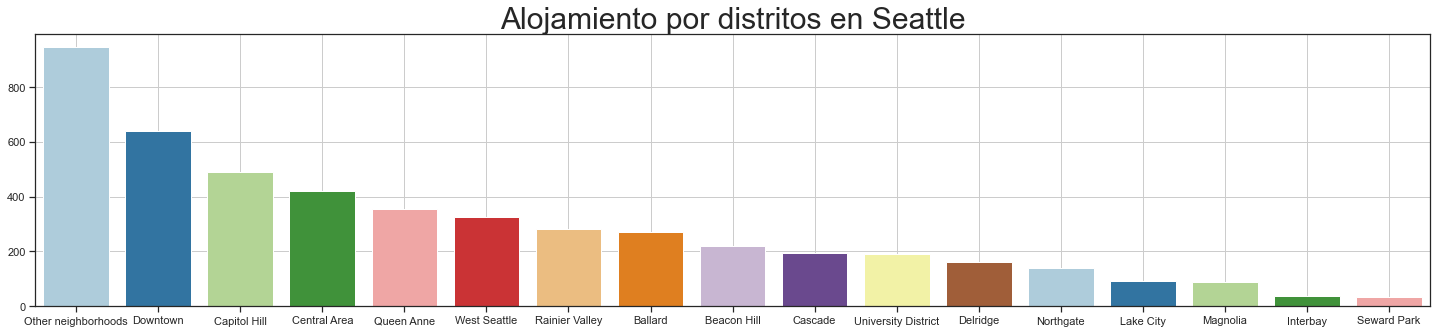

In [156]:
# quiero ver como están distribuidos los Aibnb por distrito
plt.figure(figsize=(25, 5))
sns.countplot(x = 'neighbourhood_group', data=seattle, palette='Paired', order = seattle['neighbourhood_group'].value_counts().index)
plt.title("Alojamiento por distritos en Seattle", fontsize= 30)
plt.xlabel("Distritos")
plt.ylabel("Volumen de alojamientos")
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.savefig('./img/alojamiento_por_distritos_seattle.png') 

In [157]:
# quiero empezar a analizar los precios

    neighbourhood_group  price
7              Interbay     73
6              Downtown     50
3               Cascade     40
8             Lake City     37
0               Ballard     35
9              Magnolia     33
5              Delridge     31
4          Central Area     30
13       Rainier Valley     30
16         West Seattle     30
14          Seward Park     25
15  University District     25
10            Northgate     24
11  Other neighborhoods     19
2          Capitol Hill     18
1           Beacon Hill     13
12           Queen Anne     10


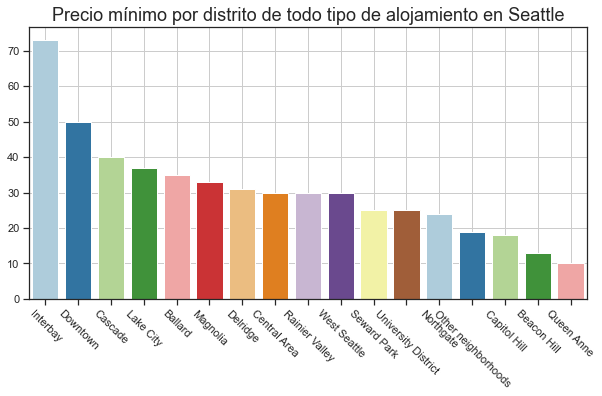

In [158]:
#quiero ver el precio mínimo por distrito
d = seattle.groupby('neighbourhood_group')[['price']].min().reset_index().sort_values(by=['price'], ascending=False)   # importante el tema del reset index xk si no, no me deja
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="price", data=d, palette='Paired')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = -45);
plt.title('Precio mínimo por distrito de todo tipo de alojamiento en Seattle', fontsize= 18);
plt.savefig('./img/precio_min_distrito_seattle.png') 

    neighbourhood_group  price
4          Central Area   3750
6              Downtown   3000
0               Ballard   1298
12           Queen Anne   1200
11  Other neighborhoods   1132
5              Delridge   1000
3               Cascade    960
10            Northgate    950
8             Lake City    879
2          Capitol Hill    843
16         West Seattle    829
9              Magnolia    756
13       Rainier Valley    580
1           Beacon Hill    549
15  University District    541
14          Seward Park    495
7              Interbay    317


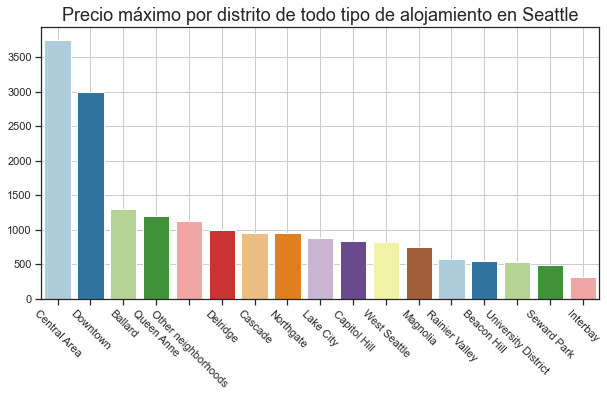

In [159]:
# quiero ver el precio máximo por distrito
d = seattle.groupby('neighbourhood_group')[['price']].max().reset_index().sort_values(by=['price'], ascending=False) 
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="price", data=d, palette='Paired')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = -45);
plt.title('Precio máximo por distrito de todo tipo de alojamiento en Seattle', fontsize= 18);
plt.savefig('./img/precio_max_distrito_todos_aloj_seattle.png') 

    neighbourhood_group       price
12           Queen Anne  202.124646
4          Central Area  187.961905
9              Magnolia  176.840909
0               Ballard  175.832714
6              Downtown  174.119122
14          Seward Park  167.485714
3               Cascade  163.469388
16         West Seattle  158.687117
11  Other neighborhoods  153.825212
2          Capitol Hill  153.177189
5              Delridge  142.122699
13       Rainier Valley  141.533808
8             Lake City  138.902174
1           Beacon Hill  130.663636
7              Interbay  126.270270
15  University District  121.314136
10            Northgate  105.417266


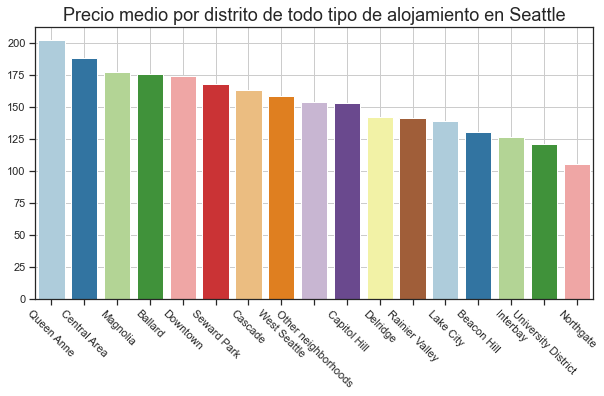

In [160]:
# quiero ver la media de los precios por distrito
d = seattle.groupby('neighbourhood_group')[['price']].mean().reset_index().sort_values(by=['price'], ascending=False) 
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="price", data=d, palette='Paired')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = -45);
plt.title('Precio medio por distrito de todo tipo de alojamiento en Seattle', fontsize= 18);
plt.savefig('./img/precio_media_distrito_seattle.png') 

In [161]:
seattle.price.describe()

count    4883.000000
mean      159.995085
std       137.362519
min        10.000000
25%        90.000000
50%       128.000000
75%       188.000000
max      3750.000000
Name: price, dtype: float64

In [162]:
seattle.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
count,4.883000e+03,4.883000e+03,4883.000000,4883.000000,4883.000000,4883.000000,4883.000000,4150.000000,4883.000000,4883.000000
mean,3.686732e+16,1.102293e+08,47.625521,-122.333505,159.995085,14.190866,62.844153,2.124299,171.974401,16.165472
std,1.395225e+17,1.275190e+08,0.049301,0.033598,137.362519,21.037500,97.831989,1.869673,120.475129,21.523185
min,2.318000e+03,2.536000e+03,47.495210,-122.420700,10.000000,1.000000,0.000000,0.010000,0.000000,0.000000
25%,1.978602e+07,1.362193e+07,47.602000,-122.356325,90.000000,2.000000,3.000000,0.610000,61.000000,1.000000
50%,3.978193e+07,5.365014e+07,47.622480,-122.331375,128.000000,3.000000,22.000000,1.650000,163.000000,6.000000
75%,5.117393e+07,1.527342e+08,47.663060,-122.309900,188.000000,30.000000,80.000000,3.110000,279.000000,25.000000
max,5.882975e+17,4.487745e+08,47.737940,-122.233980,3750.000000,365.000000,1108.000000,12.600000,365.000000,152.000000


/var/folders/wx/274cwf0567bfr403dd670hhr0000gn/T/ipykernel_11756/3185419374.py:3: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.

/var/folders/wx/274cwf0567bfr403dd670hhr0000gn/T/ipykernel_11756/3185419374.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



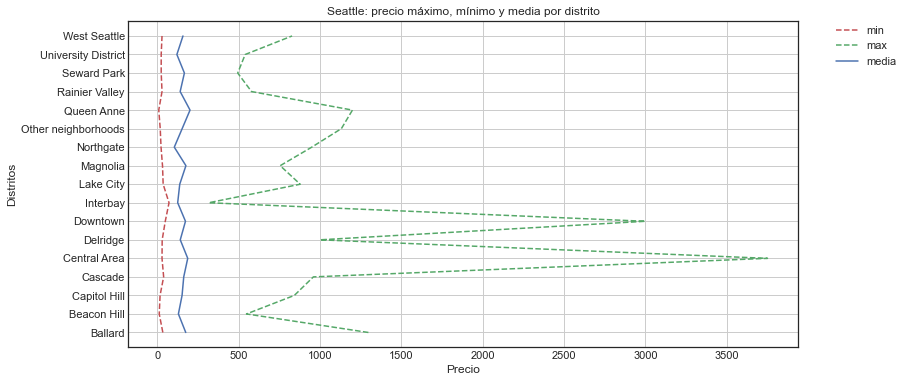

In [163]:
# precios maximos, minimos y media por distrito
precio_distrito = seattle.groupby('neighbourhood_group')
precio_min_distrito= precio_distrito.min()['price']
precio_distrito = seattle.groupby('neighbourhood_group')
precio_max_distrito= precio_distrito.max()['price']
precio_distrito = seattle.groupby('neighbourhood_group')
precio_mean_distrito= precio_distrito.mean()['price']

plt.style.use("seaborn-white")
plt.figure(figsize=(12,6)) 
plt.plot(precio_min_distrito, precio_min_distrito.index, linestyle = "--", color="r", label = "min")
plt.plot(precio_max_distrito, precio_max_distrito.index, linestyle = "--", color="g", label = "max")
plt.plot(precio_mean_distrito, precio_mean_distrito.index, linestyle = "-", color="b", label = "media")
plt.title("Seattle: precio máximo, mínimo y media por distrito")
plt.xlabel("Precio")
plt.ylabel("Distritos")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.savefig('./img/junto_min_max_precio_distrito_seattle.png') # se guarda la imagen
#plt.savefig('lineas_precio_max_distrito.png') # se guarda la imagen

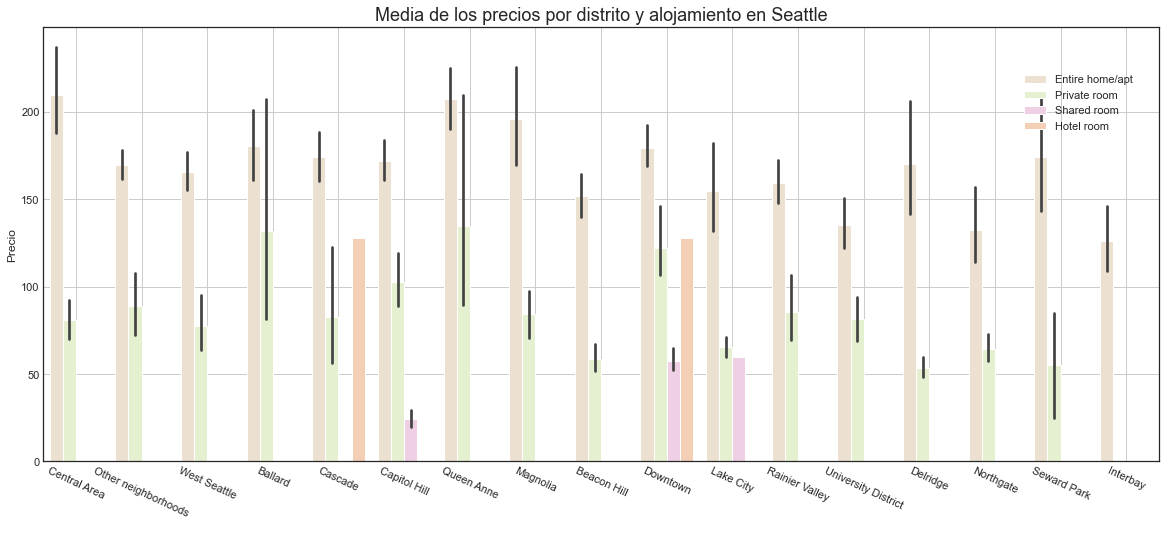

In [164]:
# visualizo agrupo por los distintos apartamentos y diferentes alojamientos la media de los precios, no la he usado en la presentación
plt.figure(figsize=(20, 8))
sns.barplot(x="neighbourhood_group", y="price", hue= 'room_type', data=seattle, palette='Pastel2_r')
plt.grid()
plt.xlabel(" ")
plt.ylabel("Precio")
plt.xticks(rotation = -25);
plt.legend(bbox_to_anchor=(1., .95), loc='upper right', borderaxespad=2.)
plt.title('Media de los precios por distrito y alojamiento en Seattle', fontsize= 18);
plt.savefig('./img/media_precio_distrito_alojamiento_seattle.png')

In [165]:
seattle.room_type.value_counts()

Entire home/apt    4088
Private room        757
Shared room          36
Hotel room            2
Name: room_type, dtype: int64

    neighbourhood_group        room_type  host_id
0               Ballard  Entire home/apt      245
1               Ballard     Private room       24
2           Beacon Hill  Entire home/apt      170
3           Beacon Hill     Private room       50
4          Capitol Hill  Entire home/apt      392
5          Capitol Hill     Private room       70
6          Capitol Hill      Shared room       29
7               Cascade  Entire home/apt      173
8               Cascade       Hotel room        1
9               Cascade     Private room       22
10         Central Area  Entire home/apt      350
11         Central Area     Private room       70
12             Delridge  Entire home/apt      124
13             Delridge     Private room       39
14             Downtown  Entire home/apt      586
15             Downtown       Hotel room        1
16             Downtown     Private room       45
17             Downtown      Shared room        6
18             Interbay  Entire home/apt       37


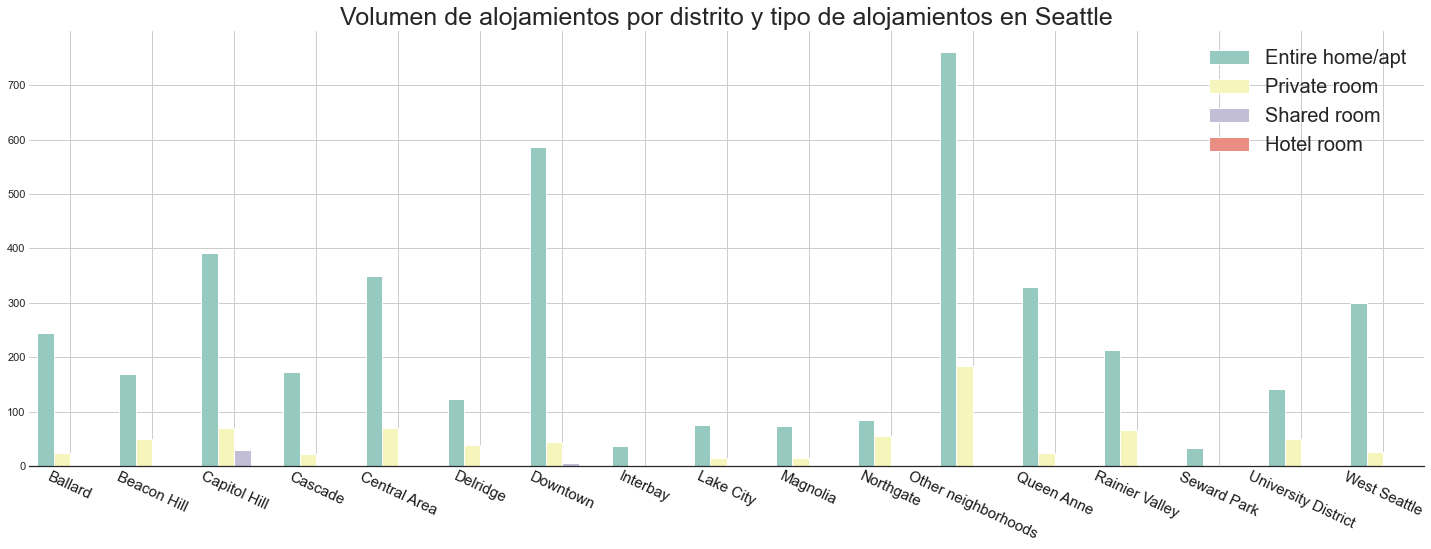

In [166]:
# quiero ver por distrito que tipo de apartamento hay más, Está bien
# agrupo por tipo de habitación, tipo de distrito y usaré de referencia el host_id porque lo que devuelve es númerico no como el host name, pruebas
apartamento_por_distrito = pd.DataFrame(seattle[['host_id','room_type','neighbourhood_group']].groupby(['neighbourhood_group','room_type']).host_id.count().reset_index())
print(apartamento_por_distrito)
plt.figure(figsize=(25, 8))
sns.barplot( x="neighbourhood_group", y="host_id", data=apartamento_por_distrito, hue ='room_type', palette='Set3')
plt.grid()
plt.title('Volumen de alojamientos por distrito y tipo de alojamientos en Seattle', size=25)
plt.legend(loc="upper right",  fontsize= 20)
sns.despine(left = True)
plt.xticks(size=15, color= 'k')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = -25);
# sns.despine(left = True);
plt.savefig('./img/volumen_alojamiento_distrito_seattle.png') # se guarda la imagen

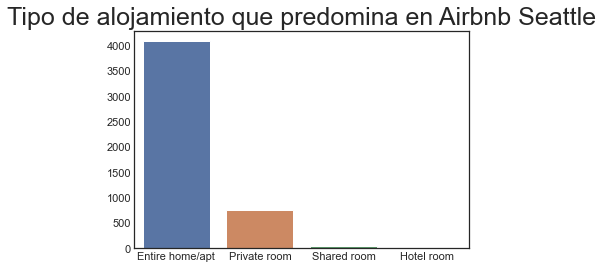

In [167]:
# visualizo qué tipo de alojamiento hay más
sns.countplot(x = 'room_type', data=seattle)
plt.xlabel('')
plt.ylabel('')
plt.title('Tipo de alojamiento que predomina en Airbnb Seattle', size=25);
plt.savefig('./img/volumen_alojamiento_distrito_seattle.png') 

In [168]:
# observo las descripciones general de los precios
seattle.price.describe()

count    4883.000000
mean      159.995085
std       137.362519
min        10.000000
25%        90.000000
50%       128.000000
75%       188.000000
max      3750.000000
Name: price, dtype: float64

In [169]:
seattle.groupby('room_type')[['price']].mean()

,price
room_type,
Entire home/apt,174.753425
Hotel room,128.000000
Private room,86.532365
Shared room,30.638889


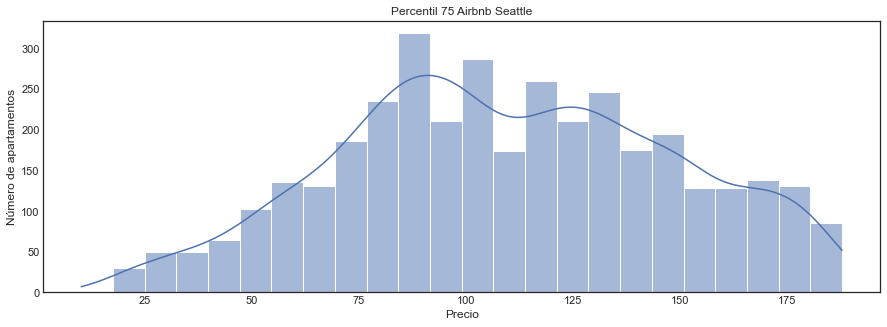

In [170]:
# Visualizo como está distribuido el percentil 75
inferior_150 = seattle[seattle['price']<=188] 


plt.figure(figsize=(15,5))
sns.histplot(x='price', data=inferior_150, kde=True, palette='Pastel2_r')
plt.title('Percentil 75 Airbnb Seattle')
plt.xlabel("Precio")
plt.ylabel("Número de apartamentos")
plt.savefig('./img/alojamientos_precio_percentil_seattle.png') # se guarda la imagen

         room_type       price
0  Entire home/apt  174.753425
1       Hotel room  128.000000
2     Private room   86.532365
3      Shared room   30.638889


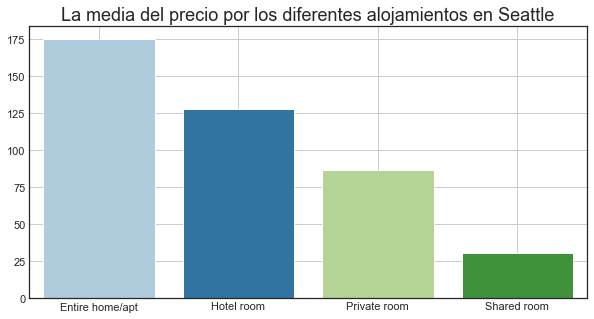

In [171]:
# quiero ver el precio media por los diferentes tipos de alojamientos
d = seattle.groupby('room_type')[['price']].mean().reset_index().sort_values(by=['price'], ascending=False) 
print(d)

plt.figure(figsize=(10, 5))
sns.barplot(x="room_type", y="price", data=d, palette='Paired')
plt.title('La media del precio por los diferentes alojamientos en Seattle', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.savefig('./img/precio_medio_por_alojamiento_seattle.png')

In [172]:
d = seattle.groupby('room_type')[['price']].describe()
print(d)

                  price                                                      \
                  count        mean         std    min    25%    50%    75%   
room_type                                                                     
Entire home/apt  4088.0  174.753425  140.435796   10.0  102.0  139.0  200.0   
Hotel room          2.0  128.000000    0.000000  128.0  128.0  128.0  128.0   
Private room      757.0   86.532365   88.479203   13.0   50.0   68.0   90.0   
Shared room        36.0   30.638889   18.939230   18.0   20.0   20.0   35.0   

                         
                    max  
room_type                
Entire home/apt  3750.0  
Hotel room        128.0  
Private room      999.0  
Shared room        80.0  


         room_type  price
0  Entire home/apt   3750
2     Private room    999
1       Hotel room    128
3      Shared room     80


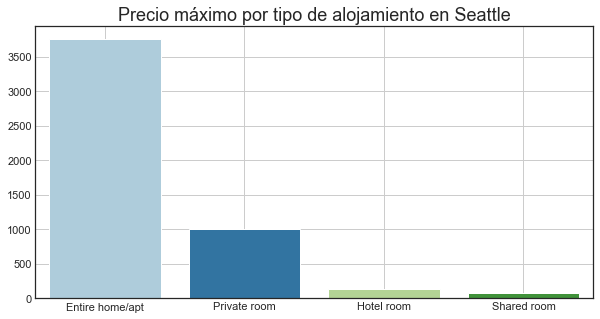

In [173]:
# quiero visualizar el precio máximo por alojamientos
d = seattle.groupby('room_type')[['price']].max().reset_index().sort_values(by=['price'], ascending=False) 
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="room_type", y="price", data=d, palette='Paired')
plt.title('Precio máximo por tipo de alojamiento en Seattle', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.savefig('./img/precio_max_por_alojamiento_seattle.png')

         room_type  price
0  Entire home/apt     10
2     Private room     13
3      Shared room     18
1       Hotel room    128


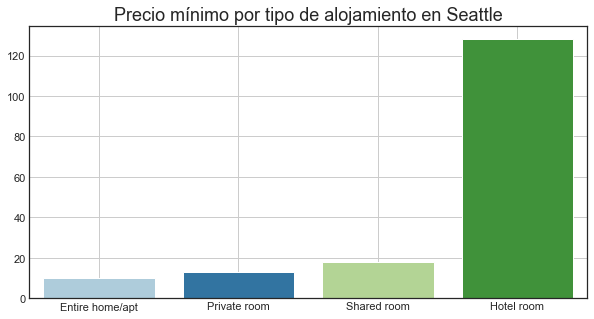

In [174]:
# quiero ver el precio mínimo por alojamiento
d = seattle.groupby('room_type')[['price']].min().reset_index().sort_values(by=['price'])
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="room_type", y="price", data=d, palette='Paired')
plt.title('Precio mínimo por tipo de alojamiento en Seattle', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.savefig('./img/precio_min_por_alojamiento_seattle.png') 

/Users/lauragarciasanchez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



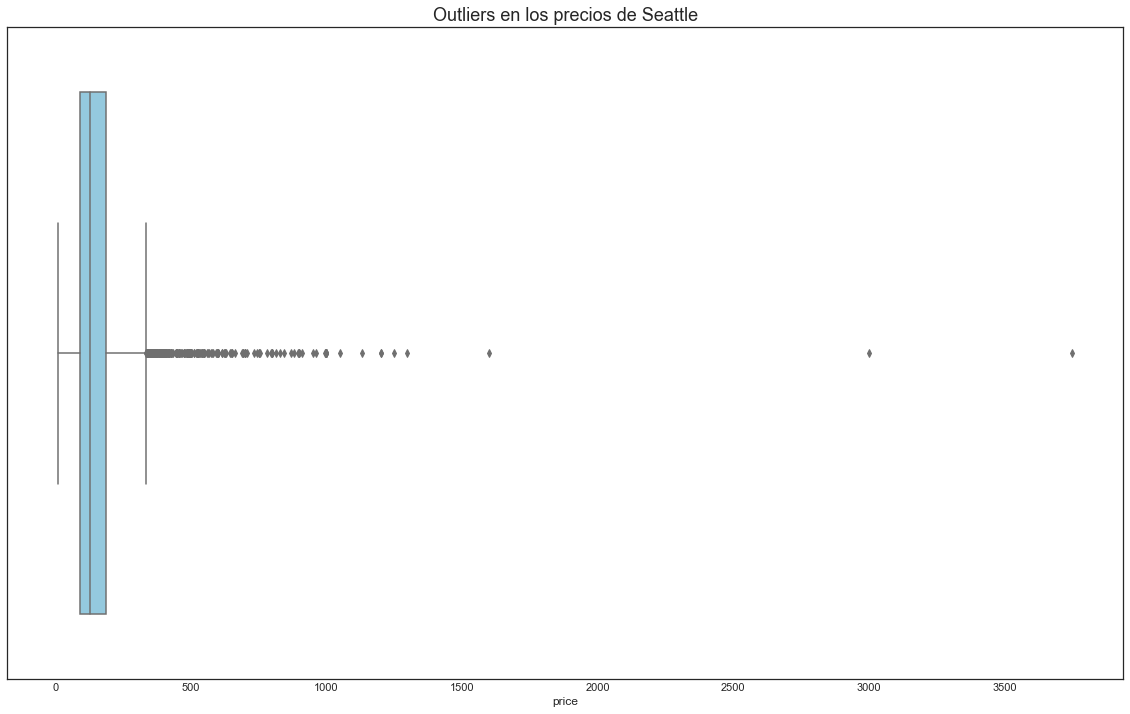

In [175]:
# outliers de los precios
plt.figure(figsize=(20,12))
sns.boxplot(seattle['price'], color= 'skyblue')
plt.title('Outliers en los precios de Seattle', fontsize= 18);
plt.savefig('./img/precio_boxplot_seattle.png') 

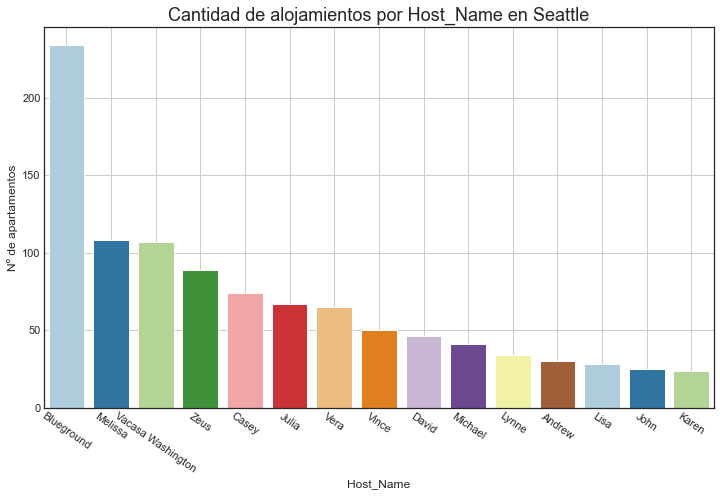

In [176]:
# Visualizo en con el host_name cuantos apartamentos tiene cada uno de ellos
host_name_apartamentos = pd.DataFrame({'Host_Name':seattle['host_name'].value_counts(ascending=False).index,
                               'Nº de apartamentos': seattle['host_name'].value_counts(ascending=False).values})[:15]
plt.figure(figsize=(12,7))
sns.barplot(x='Host_Name', y='Nº de apartamentos', data = host_name_apartamentos, palette='Paired')
plt.title('Cantidad de alojamientos por Host_Name en Seattle', fontsize= 18)
plt.xticks(rotation = -35)
plt.grid()
plt.savefig('./img/alojamientos_host_name_seattle.png') 

    neighbourhood_group  availability_365
3               Cascade        241.403061
7              Interbay        228.000000
15  University District        208.874346
6              Downtown        202.221003
10            Northgate        173.611511
8             Lake City        173.543478
0               Ballard        172.126394
2          Capitol Hill        169.201629
12           Queen Anne        166.864023
13       Rainier Valley        163.850534
11  Other neighborhoods        161.569915
9              Magnolia        153.670455
4          Central Area        152.561905
5              Delridge        151.723926
16         West Seattle        148.966258
1           Beacon Hill        146.913636
14          Seward Park        140.828571


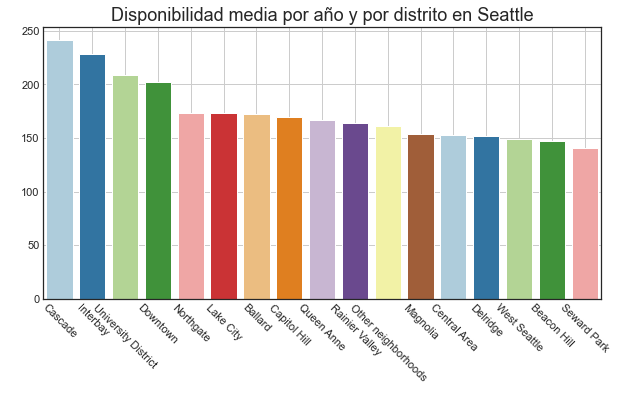

In [177]:
# quiero ver la disponibilidad media por distrito
d = seattle.groupby('neighbourhood_group')[['availability_365']].mean().reset_index().sort_values(by=['availability_365'], ascending=False)   # importante el tema del reset index xk si no, no me deja
print(d)

plt.figure(figsize=(10, 5))
sns.barplot( x="neighbourhood_group",y="availability_365", data=d, palette='Paired' )
plt.grid()
plt.ylabel(" ")
plt.xlabel(" ")
plt.xticks(rotation = -45);
plt.title('Disponibilidad media por año y por distrito en Seattle', fontsize= 18);
plt.savefig('./img/disponiblidad_distrito_seattle.png')

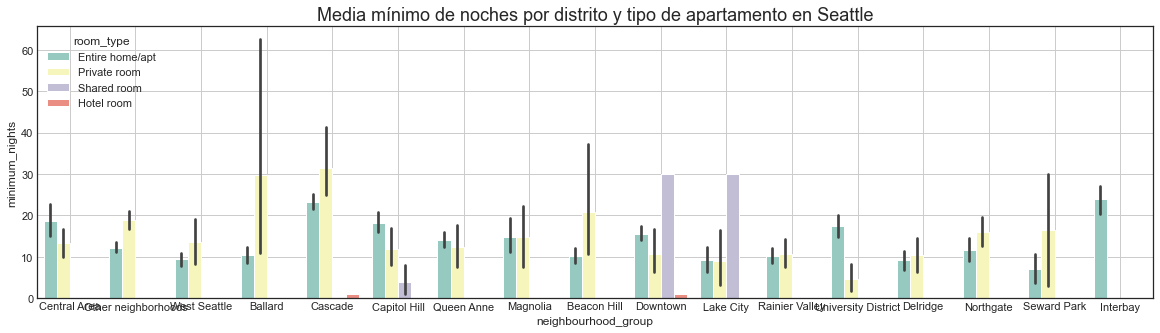

In [178]:
# quiero saber por tipo de apartamento y en que distrito, lo minimo que piden por noche
plt.figure(figsize=(20, 5))
sns.barplot( x="neighbourhood_group",y="minimum_nights", hue = 'room_type',data=seattle, palette='Set3')
plt.grid()
plt.title('Media mínimo de noches por distrito y tipo de apartamento en Seattle', fontsize= 18);
plt.savefig('./img/minnoches_distrito_room_type_seattle.png')

In [179]:
seattle.number_of_reviews.describe()  # hacer bloxpot para ver outliers de las reseñas?

count    4883.000000
mean       62.844153
std        97.831989
min         0.000000
25%         3.000000
50%        22.000000
75%        80.000000
max      1108.000000
Name: number_of_reviews, dtype: float64

In [180]:
seattle.number_of_reviews.sum()

306868

    neighbourhood_group  number_of_reviews
11  Other neighborhoods              71943
6              Downtown              39455
2          Capitol Hill              30714
4          Central Area              25353
0               Ballard              24107
12           Queen Anne              23643
16         West Seattle              22378
13       Rainier Valley              17418
1           Beacon Hill              11629
5              Delridge               8184
10            Northgate               6490
9              Magnolia               6062
15  University District               5275
3               Cascade               5207
8             Lake City               4959
14          Seward Park               2537
7              Interbay               1514


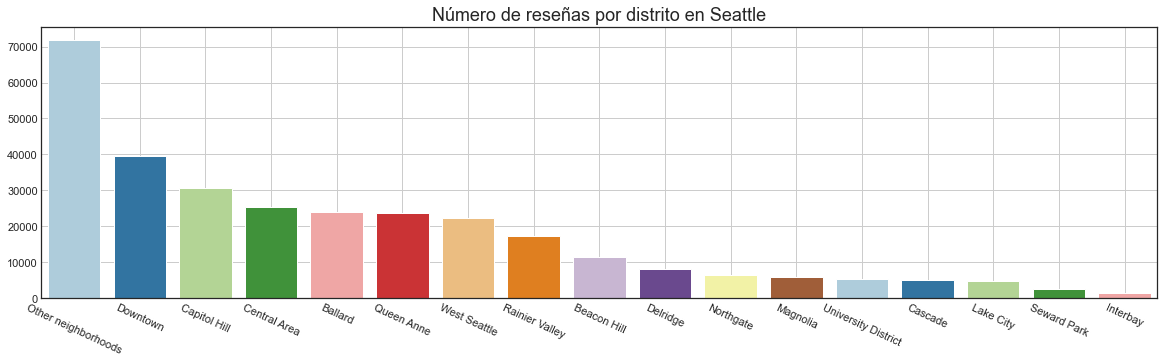

In [181]:
# visualizo por separado el numero de reseñas por distrito
d = seattle.groupby('neighbourhood_group', )[['number_of_reviews']].sum().reset_index().sort_values(by=['number_of_reviews'], ascending=False)
print(d)

plt.figure(figsize=(20, 5))
sns.barplot( x="neighbourhood_group",y="number_of_reviews", data=d, palette='Paired')
plt.grid()
plt.xticks(rotation = -25);
plt.title('Número de reseñas por distrito en Seattle', fontsize= 18)
plt.xlabel('')
plt.ylabel('');
plt.savefig('./img/numreseñas_distrito_seattle_sum.png') 

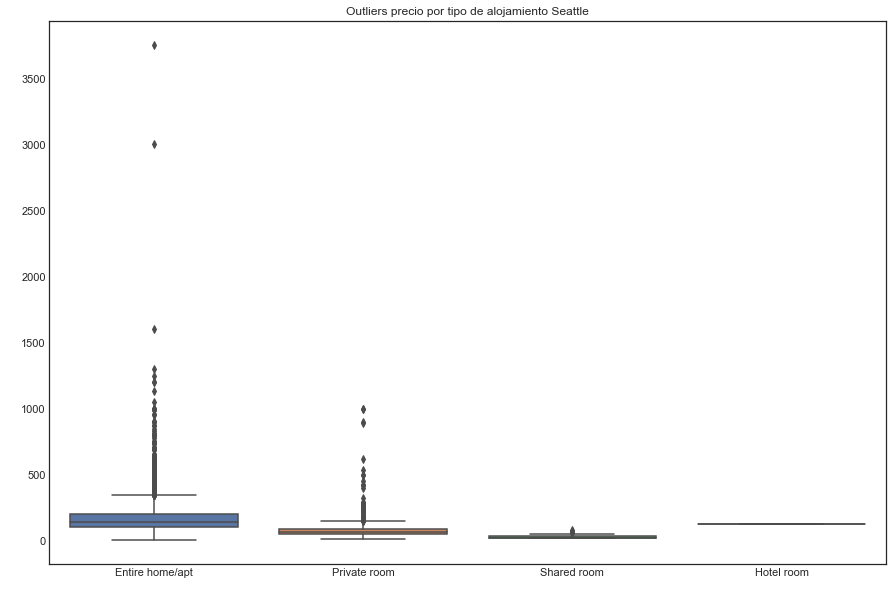

<Figure size 432x288 with 0 Axes>

In [182]:
# outliers precio por tipo de alojamiento
plt.figure(figsize=(15,10))
sns.boxplot(data=seattle, x='room_type', y='price')
plt.title('Outliers precio por tipo de alojamiento Seattle')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()
plt.savefig('./img/outlier_precio_room_type_seattle.png') 

# Mapas


In [183]:
# from IPython.display import IFrame
# documentation = IFrame(src='https://python-visualization.github.io/folium/', width=1000, height=500)
# #   display(documentation)
# # esto es la documentacion oficial de folium, lo busca en internet y me lo trae
# import folium
# from folium import plugins
# import ipywidgets  
# import geocoder
# import geopy
# import numpy 
# import pandas as pd
# from vega_datasets import data as vds

In [184]:
# preparo dataframe para hacer el mapa por barrios
lat = pd.pivot_table(seattle, index= 'neighbourhood', values='latitude').reset_index()
print(lat)
lon = pd.pivot_table(seattle, index= 'neighbourhood', values='longitude').reset_index()
print(lon)
mapa_barrios = pd.merge(lat, lon)

       neighbourhood   latitude
0              Adams  47.671288
1               Alki  47.575131
2      Arbor Heights  47.506721
3           Atlantic  47.595678
4           Belltown  47.615383
..               ...        ...
84     West Woodland  47.668869
85          Westlake  47.635303
86  Whittier Heights  47.681161
87        Windermere  47.668586
88    Yesler Terrace  47.605173

[89 rows x 2 columns]
       neighbourhood   longitude
0              Adams -122.386828
1               Alki -122.408206
2      Arbor Heights -122.377404
3           Atlantic -122.304901
4           Belltown -122.344367
..               ...         ...
84     West Woodland -122.366801
85          Westlake -122.341349
86  Whittier Heights -122.372643
87        Windermere -122.272099
88    Yesler Terrace -122.319869

[89 rows x 2 columns]


In [185]:
# preparo dataframe para hacer el mapa por barrios
lat = pd.pivot_table(seattle, index= 'neighbourhood_group', values='latitude').reset_index()
#print(lat)
lon = pd.pivot_table(seattle, index= 'neighbourhood_group', values='longitude').reset_index()
#print(lon)
mapa_distritos = pd.merge(lat, lon)
print(mapa_distritos)

    neighbourhood_group   latitude   longitude
0               Ballard  47.674833 -122.380839
1           Beacon Hill  47.564524 -122.303520
2          Capitol Hill  47.626038 -122.314365
3               Cascade  47.629895 -122.333128
4          Central Area  47.607378 -122.302433
5              Delridge  47.541542 -122.358737
6              Downtown  47.611324 -122.337469
7              Interbay  47.645055 -122.378380
8             Lake City  47.717502 -122.292573
9              Magnolia  47.648465 -122.394255
10            Northgate  47.708077 -122.326304
11  Other neighborhoods  47.670866 -122.335301
12           Queen Anne  47.634179 -122.359275
13       Rainier Valley  47.544821 -122.276669
14          Seward Park  47.555673 -122.267657
15  University District  47.662950 -122.314192
16         West Seattle  47.560610 -122.390790


In [186]:
map_geojson = folium.Map(location=[47.560610, -122.390790], zoom_start=11, width="%100",height="%100") # asi se crea el mapa
mapa = folium.GeoJson("./neighbourhoods.geojson", name= "geojson airbnb").add_to(map_geojson)
folium.LayerControl().add_to(map_geojson)
mapa.save("./img/Mapa_geojson_cop_general.htlm")
map_geojson

In [187]:
# visualizo todo el mapa de Seattle con los distritos marcados 
map_geojson = folium.Map(location=[47.560610, -122.390790], zoom_start=12,  width="%100",height="%100") # asi se crea el mapa
mapa = folium.GeoJson("./neighbourhoods.geojson", name= "geojson airbnb").add_to(map_geojson)
folium.LayerControl().add_to(map_geojson)

for (index, row) in mapa_distritos.iterrows(): #iterrows va a sacar fila , o tdoas las filas
    folium.Marker(location = [row.loc["latitude"], row.loc["longitude"]],
    popup = row.loc["neighbourhood_group"],
    tooltip = "click").add_to(map_geojson)

mapa.save("Mapa_geojson.htlm")
mapa.save("Mapa_geojson.jpg");
map_geojson

In [188]:
# VIsualización por distritos
mapa_distritos
map_dist = folium.Map(location=[47.560610, -122.390790], zoom_start=12, width="%100",height="%100")

for (index, row) in mapa_distritos.iterrows(): 
    folium.Marker(location = [row.loc["latitude"], row.loc["longitude"]],
    popup = row.loc["neighbourhood_group"],
    tooltip = "click").add_to(map_dist)
mapa.save("./img/mapas/mapa_distritos_tierra_seattle.htlm") 
map_dist

In [189]:
# mapa con todos los barrios
map_barrios = folium.Map(location=[47.560610, -122.390790], zoom_start=12, width="%100",height="%100")

for (index, row) in mapa_barrios.iterrows(): 
    folium.Marker(location = [row.loc["latitude"], row.loc["longitude"]],
    popup = row.loc["neighbourhood"],
    tooltip = "click").add_to(map_barrios)
mapa.save("./img/mapas/mapa_barrios_seattle.htlm")
map_barrios